In [1]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1
from scipy.optimize import least_squares
import copy
from numba import jit
import multiprocessing
import time

In [2]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [98]:
fileIn = 'fits/1258_tri.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj)

pas/211025_2000


In [86]:
Theory.channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
Theory.datNum = list(range(len(Theory.data)))
print(sum(Theory.fitFunc({})**2))

64842.72864722503


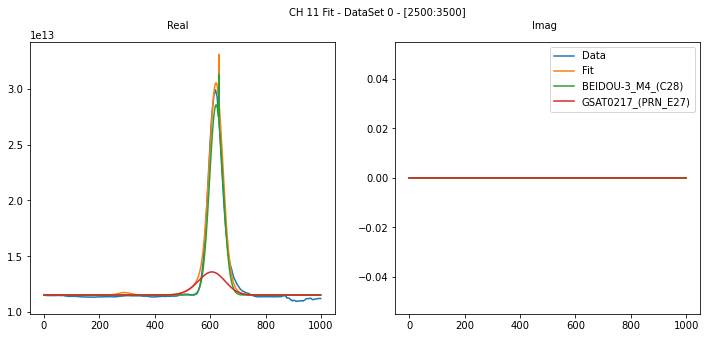

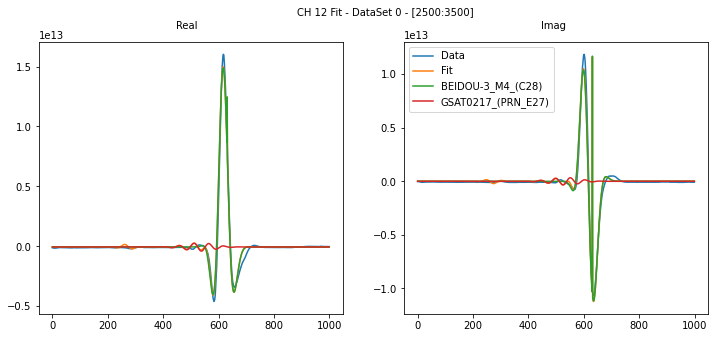

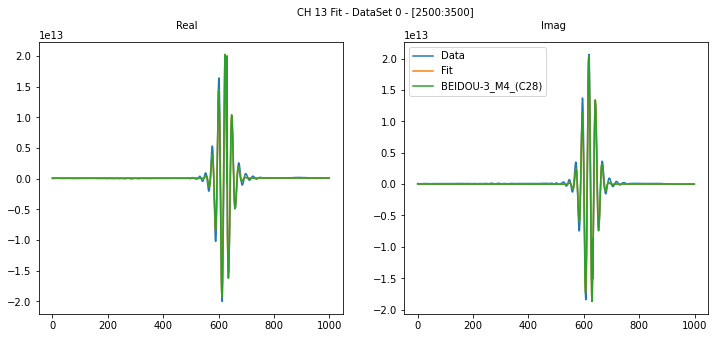

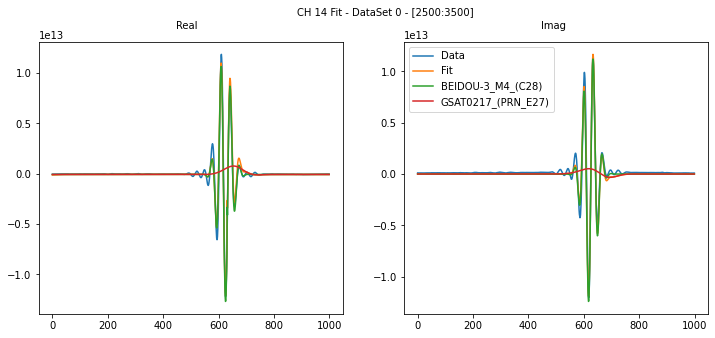

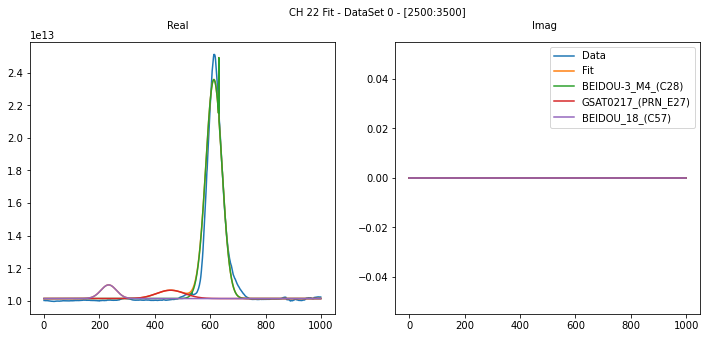

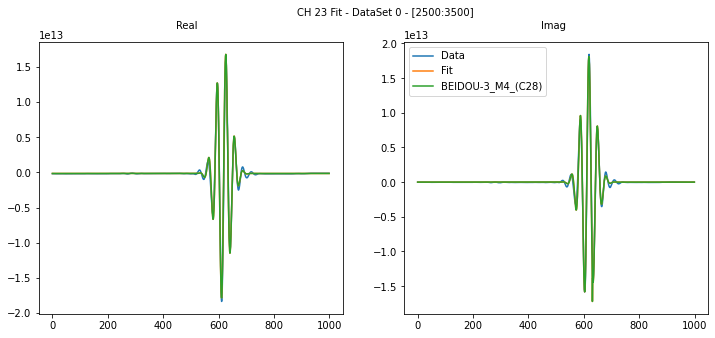

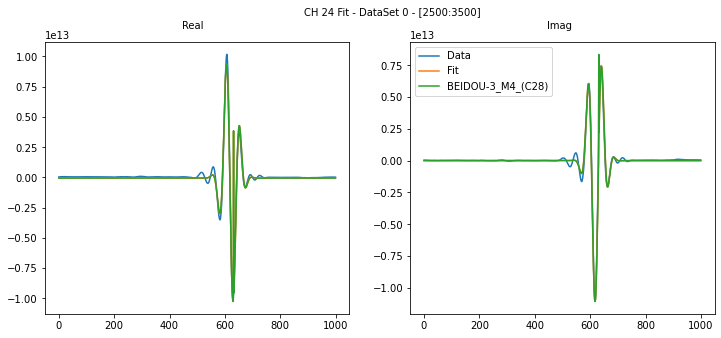

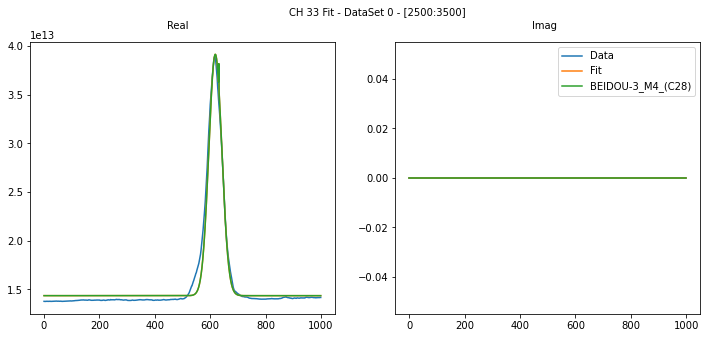

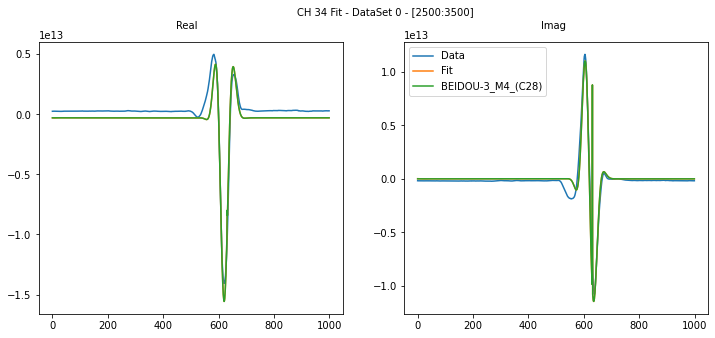

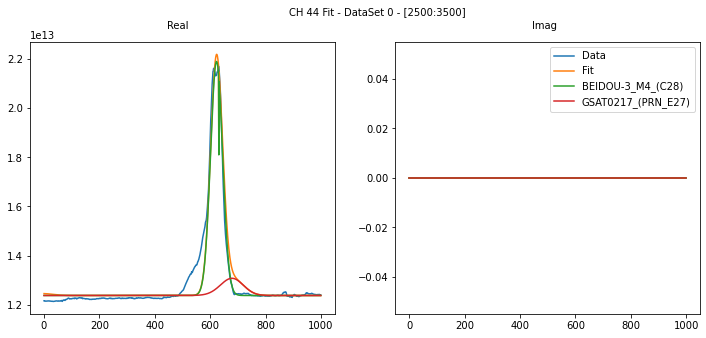

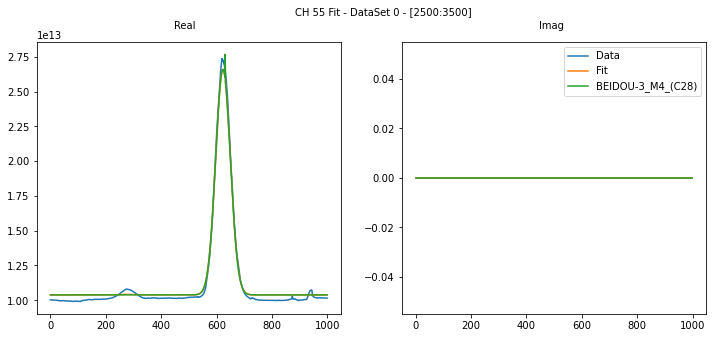

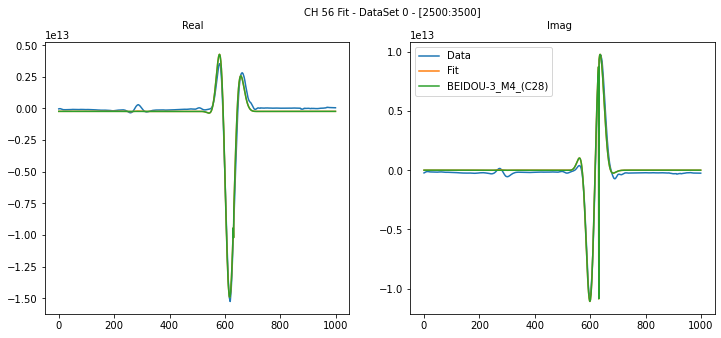

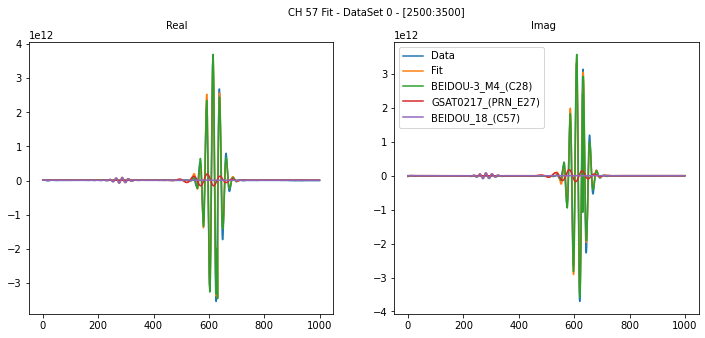

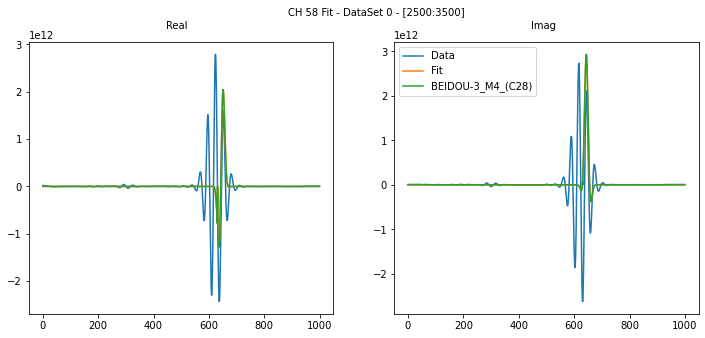

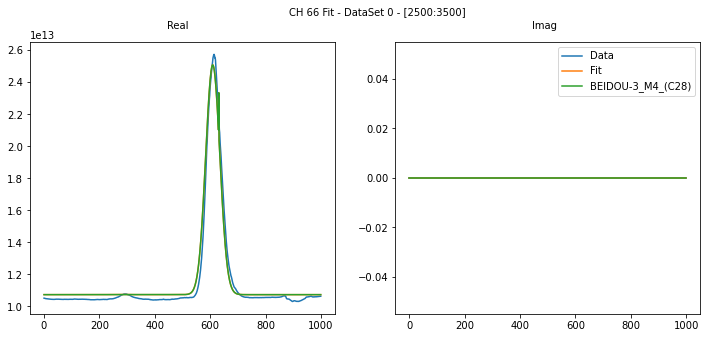

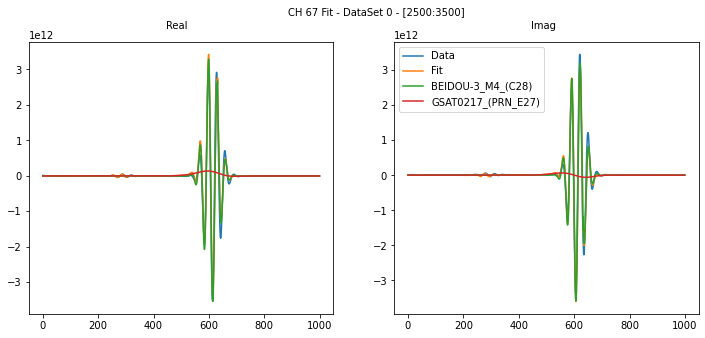

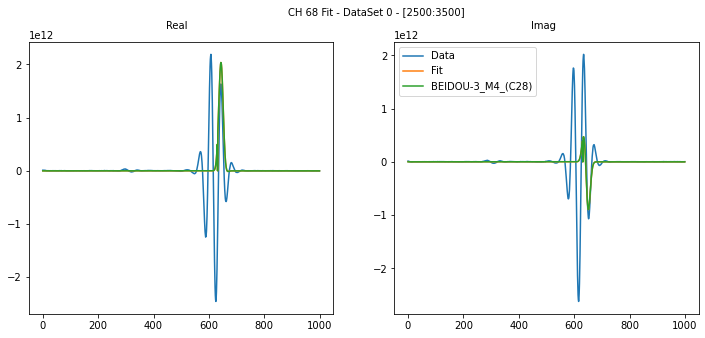

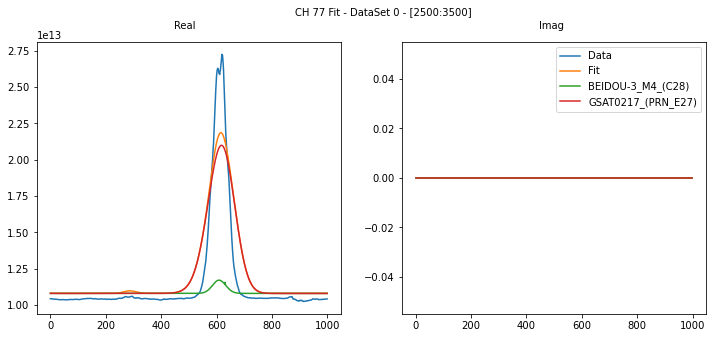

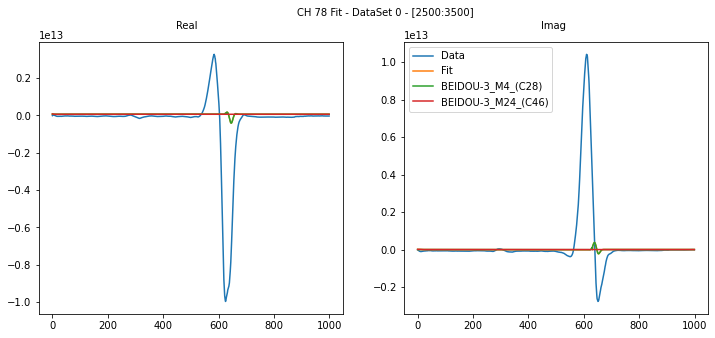

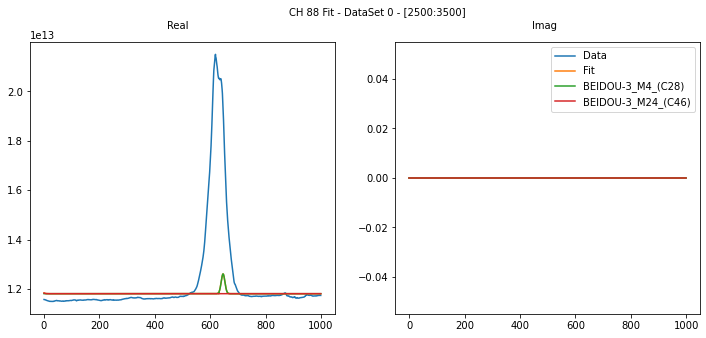

In [99]:
cut = [2500,3500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=True)

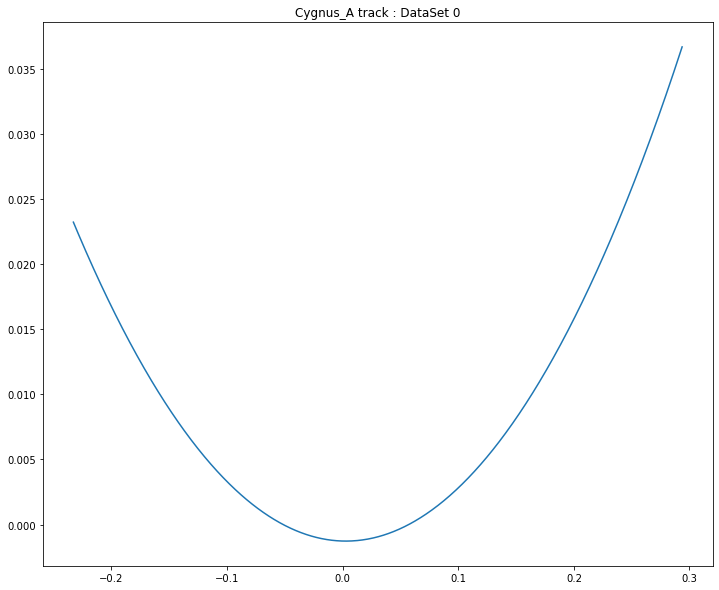

In [61]:
cut = [9000,10000]
sats=['Cygnus_A']

Theory.trackPlot(cut=cut,sats=sats)

In [17]:
def approxPeaks(Theory, width=50):
    for i,D in enumerate(Theory.data):
        for n,t in zip(Theory.satNames[i],Theory.satTracks[i]):
            cos2 = (t**2).sum(axis=-1)
            peak = (np.arange(len(cos2))[cos2==min(cos2)])[0]
            for ch in range(8):
                if max(abs(D[11*(ch+1)][max(peak-width,0):min(peak+width,len(D[11])-1)]-Theory.offsets_r[i][11*(ch+1)])) < 0:
                    amp = 0
                else:
                    amp = np.sqrt(max(abs(D[11*(ch+1)][max(peak-width,0):min(peak+width,len(D[11])-1)]-Theory.offsets_r[i][11*(ch+1)])))
                if n == 'GSAT0205_(PRN_E24)':
                    print(amp)
                Theory.setParameters({'A{}_{}_{}'.format(ch+1,n,i):amp})

In [18]:
approxPeaks(Theory)

In [24]:
print(Theory.readParameters())

{'BEIDOU-3_M4_(C28)_track_offset_x0': 0.0, 'BEIDOU-3_M4_(C28)_track_offset_y0': 0.0, 'BEIDOU-3_M4_(C28)_time_offset_0': 0, 'A1_BEIDOU-3_M4_(C28)_0': 4306744.916663879, 'A2_BEIDOU-3_M4_(C28)_0': 3861184.7810344403, 'A3_BEIDOU-3_M4_(C28)_0': 4810837.47144809, 'A4_BEIDOU-3_M4_(C28)_0': 2965163.6841325243, 'A5_BEIDOU-3_M4_(C28)_0': 4801601.827596998, 'A6_BEIDOU-3_M4_(C28)_0': 4222595.223962146, 'A7_BEIDOU-3_M4_(C28)_0': 2287945.5215791296, 'A8_BEIDOU-3_M4_(C28)_0': 2372290.449102, 'BEIDOU-3_M6_(C22)_track_offset_x0': 0.0, 'BEIDOU-3_M6_(C22)_track_offset_y0': 0.0, 'BEIDOU-3_M6_(C22)_time_offset_0': 0, 'A1_BEIDOU-3_M6_(C22)_0': 5215881.953051629, 'A2_BEIDOU-3_M6_(C22)_0': 5215993.351076462, 'A3_BEIDOU-3_M6_(C22)_0': 5977693.28026133, 'A4_BEIDOU-3_M6_(C22)_0': 4713714.572633942, 'A5_BEIDOU-3_M6_(C22)_0': 5594043.717991455, 'A6_BEIDOU-3_M6_(C22)_0': 5555320.649530412, 'A7_BEIDOU-3_M6_(C22)_0': 4407573.1613092525, 'A8_BEIDOU-3_M6_(C22)_0': 4371884.7390250815, 'GPS_BIIF-11_(PRN_10)_track_offset_